# Demonstration: QCNN algorithm


In [1]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
from pennylane import numpy as np

from PhaseEstimation import vqe, qcnn, losses, visualization as qplt, general as qmlgen, hamiltonians

### Ising Chain
#### Phases:
    1. Paramagnetic:  Label = 0
    2. Ferromagnetic: Label = 1

In [2]:
# States parameters
N        = 8
side     = 100

# Learning parameters
lr       = 0.3
n_epochs = 1000


In [3]:
myvqe  = vqe.load_vqe('../data/vqes/standard/N'+str(N)+'n'+str(side))
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit)

/home/saverio/Desktop/Quantum-Phase-Detection-ANNNI/src/PhaseEstimation/vqe.py:577: UserWarning: Outdated VQE: VQD parameters loaded
  warnings.warn("Outdated VQE: VQD parameters loaded")


In [4]:
myqcnn.train(lr, 10*n_epochs, train_index = np.arange(side), loss_fn = losses.cross_entropy1D)

Cost: 0.23826003074645996: 100%|██████████| 10000/10000 [03:17<00:00, 50.66it/s]


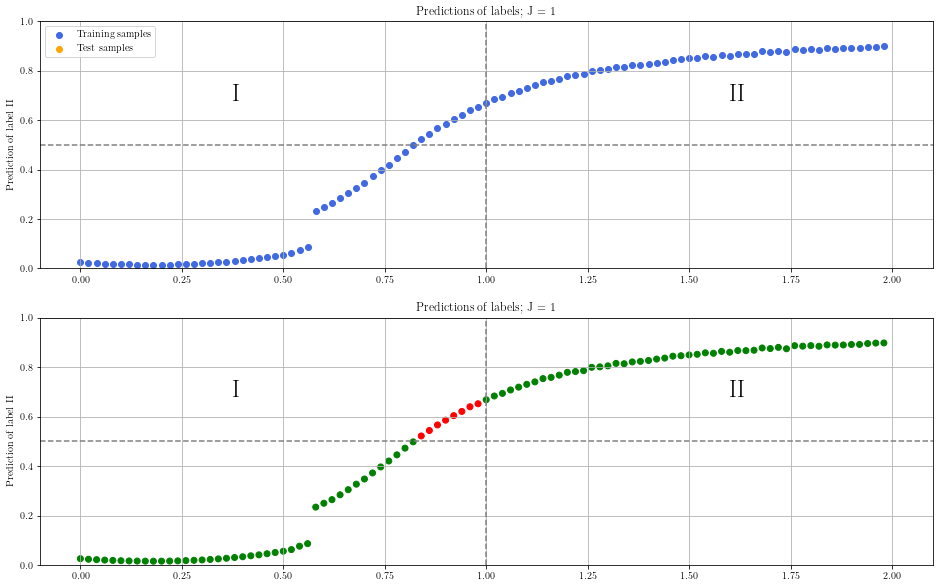

In [5]:
qplt.show_QCNN_classification1D(myqcnn, np.arange(side))

### ANNNI Model
#### Phases:
    1. Paramagnetic:  Label = [1,1]; [1,0,0,0]
    2. Ferromagnetic: Label = [0,1]; [0,0,1,0]
    3. Antiphase:     Label = [1,0]; [0,1,0,0]

In [1]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
from pennylane import numpy as np

from PhaseEstimation import vqe, qcnn, losses, visualization as qplt, general as qmlgen, hamiltonians

In [15]:
# States parameters
N        = 6
side     = 100

# Learning parameters
lr       = 0.03
n_epochs = 2000

In [16]:
myvqe  = vqe.load_vqe('../data/vqes/ANNNI/N'+str(N)+'n'+str(side))
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit, n_outputs=2)

In [17]:
myqcnn.train(lr, n_epochs, train_index = np.arange(2*side), loss_fn = losses.cross_entropy_power4)

Cost: 0.01926918514072895: 100%|██████████| 2000/2000 [00:25<00:00, 79.15it/s]  


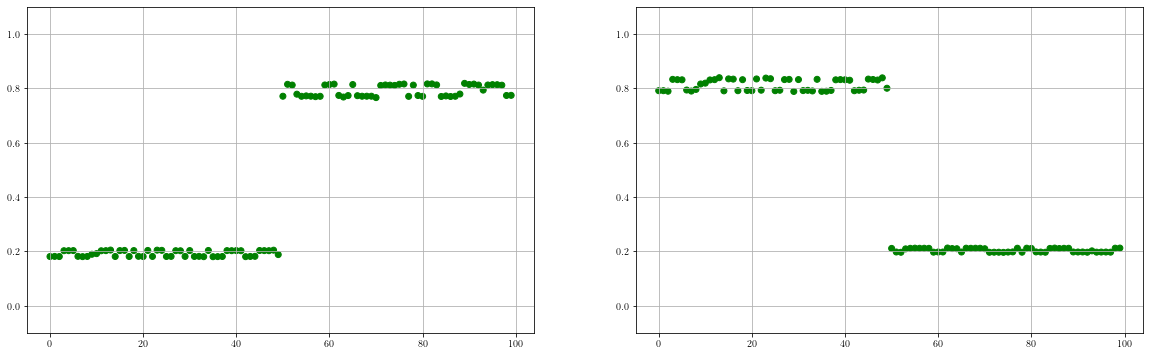

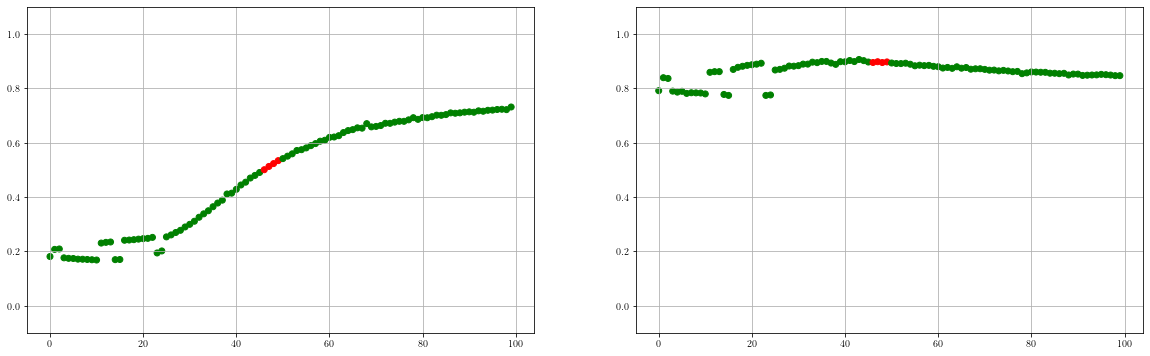

In [18]:
qplt.show_QCNN_classification2D(myqcnn)

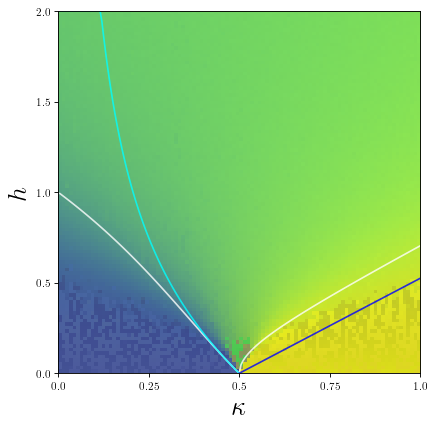

In [19]:
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = False, morelines = True)

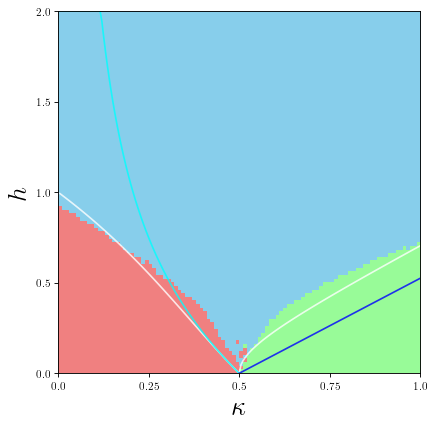

: 

In [20]:
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = True,  morelines = True)
